# Exploratory Data Analysis of Job Posting on Glassdoor

This project endeavors to turn raw web-scrapped data into actionable insights through meticulous data cleaning and exploratory data analysis (EDA). By delving into the intricacies of the dataset, I aim to uncover patterns and key insights from the job market landscape, hedding light on dependencies, skill demands, and geographical aspects. 

Data set commes from kaggle, and contains 672 observations and 14 variables. Source: https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor

## Data Cleaning and Preparation

In [1]:
# Loading data set and libraries I'am going to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Uncleaned_DS_jobs.csv', delimiter=',')
df.set_index('index', inplace=True)

### Understanding the data I'm going to work with

In [2]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
df.shape

(672, 14)

In [4]:
# Verifing if the DataFrame contains duplicate rows and removing them.

print(df.duplicated(keep = 'first').sum())
df = df.drop_duplicates()

13


In [5]:
# Verifing if the DataFrame contains null values.

df.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

### Job Title

In [6]:
df['Job Title'].value_counts()

Job Title
Data Scientist                                            326
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  15
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: count, Length: 172, dtype: int64

In [7]:
# The 'Job Title' column contains 172 uniqe values. My objective is to categorize them for future analysis.

def title_simplifier(title):
    if 'data analyst' in title.lower():
        return 'Data Analyst'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'machine learning engineer' in title.lower():
        return 'Machine Learning Engineer'
    elif 'data scientist' in title.lower():
        return 'Data Scientist'
    elif 'machine learning' in title.lower():
        return 'Data Scientist'
    elif 'manager' in title.lower() or 'lead' in title.lower() or 'director' in title.lower():
        return 'Data Science Manager'
    elif 'data science' in title.lower():
        return 'Data Scientist'
    elif 'data modeler' in title.lower():
        return 'Data Modeler'
    else:
        return 'Other'
    
df['Simplified Job Title'] = df['Job Title'].apply(title_simplifier)
df['Simplified Job Title'].value_counts()

Simplified Job Title
Data Scientist               470
Other                         56
Data Analyst                  47
Data Engineer                 46
Machine Learning Engineer     22
Data Science Manager          13
Data Modeler                   5
Name: count, dtype: int64

### Salary Estimate	

In [8]:
# The 'Salary Estimate' column contains both numeric and text values. I've decided to split them into two separate columns, and create a new one with average values.

df['Salary Estimate'] = df['Salary Estimate'].astype(str)

df['Salary Estimate'] = (df['Salary Estimate'].str.replace('$', '').str.replace('K', '').str.replace('(Glassdoor est.)', '').str.replace('(Employer est.)', ''))

df['Min salary'] = df['Salary Estimate'].str.split('-').str[0]
df['Max salary'] = df['Salary Estimate'].str.split('-').str[1]

df['Min salary'] = df['Min salary'].astype(int)
df['Max salary'] = df['Max salary'].astype(int)
df['Avg salary'] = (df['Max salary'] + df['Min salary']) / 2

df.drop(['Salary Estimate'], axis=1, inplace=True)

df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Simplified Job Title,Min salary,Max salary,Avg salary
index,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",Data Scientist,137,171,154.0
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,Data Scientist,137,171,154.0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,Data Scientist,137,171,154.0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",Data Scientist,137,171,154.0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,137,171,154.0


### Job Description

In [9]:
# The 'Job Description' column consist '\n' characters scattered throughout the text, which seems to be an error. Therefore, I've decided to remove them.

df['Job Description'] = df['Job Description'].str.replace('\n', ' ')
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Simplified Job Title,Min salary,Max salary,Avg salary
index,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,Description The Senior Data Scientist is resp...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",Data Scientist,137,171,154.0
1,Data Scientist,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,Data Scientist,137,171,154.0
2,Data Scientist,Overview Analysis Group is one of the larges...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,Data Scientist,137,171,154.0
3,Data Scientist,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",Data Scientist,137,171,154.0
4,Data Scientist,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,137,171,154.0


### Rating

In [10]:
df['Rating'].describe()

count    659.000000
mean       3.592413
std        1.295563
min       -1.000000
25%        3.400000
50%        3.800000
75%        4.300000
max        5.000000
Name: Rating, dtype: float64

In [11]:
# "Glassdoor accepts only positive values for ratings. However, in this column, we observe a minimum value of '-1'. Based on that, I infer that null values have been replaced with '-1'.

df['Rating'] = (df['Rating'].replace(-1.0, 'Unknown'))

### Company Name

In [12]:
# The 'Company Name' column also contains information about rating, what shouldn't be present.

df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

### Location

In [13]:
# The 'Location' column contains full state name and its abbreviation after a comma. I've decided to split them into two separate columns.

df['Location Full Name'] = df['Location'].str.split(',').str[0]
df['Location Abbreviation'] = df['Location'].str.split(',').str[1]

print(df[df['Location Abbreviation'].isnull()]['Location Full Name'].value_counts())


Location Full Name
United States    11
Remote            5
Utah              2
New Jersey        2
Texas             1
California        1
Name: count, dtype: int64


In [14]:
# It looks like some values after a comma were not abbreviations, I've decided to fix that.

def Location_Abbreviation_Fix(abbreviation, full_name):
    if full_name == 'United States':
        return 'US'
    if full_name == 'Utah':
        return 'UT'
    if full_name == 'New Jersey':
        return 'NJ'
    if full_name == 'Texas':
        return 'TX'
    if full_name == 'California':
        return 'CA'
    if full_name == 'Remote':
        return 'REM'
    else:
        return abbreviation

df['Location Abbreviation'] = df.apply(lambda row: Location_Abbreviation_Fix(row['Location Abbreviation'], row['Location Full Name']), axis=1)
print(df['Location Abbreviation'].value_counts())

df['Location Abbreviation'] = df['Location Abbreviation'].str.strip().replace('Anne Arundel', 'MD')

df.drop(['Location'], axis=1, inplace=True)
df.head()

Location Abbreviation
 CA              154
 VA               89
 MA               62
 NY               52
 MD               39
 IL               30
 DC               26
 TX               17
 WA               16
 OH               14
 PA               12
 MO               12
US                11
 NJ               10
 CO               10
 NC                9
 GA                9
 TN                8
 FL                8
 OK                6
 WI                6
REM                5
 IN                5
 MI                5
 CT                4
 AL                4
 MN                4
 AZ                4
 NE                3
 IA                3
 RI                2
NJ                 2
 SC                2
 OR                2
 UT                2
UT                 2
 NH                2
 MS                1
 LA                1
 KS                1
TX                 1
 DE                1
 Anne Arundel      1
CA                 1
 WV                1
Name: count, dtype: int64


,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Simplified Job Title,Min salary,Max salary,Avg salary,Location Full Name,Location Abbreviation
index,,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,Description The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",Data Scientist,137,171,154.0,New York,NY
1,Data Scientist,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,"Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,Data Scientist,137,171,154.0,Chantilly,VA
2,Data Scientist,Overview Analysis Group is one of the larges...,3.8,Analysis Group,"Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,Data Scientist,137,171,154.0,Boston,MA
3,Data Scientist,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",Data Scientist,137,171,154.0,Newton,MA
4,Data Scientist,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,137,171,154.0,New York,NY


### Type of ownership

In [15]:
print(f'Before changes\n')
print(df['Type of ownership'].value_counts())

# The 'Type of ownership' contains -1 values which needs to replaced. I've also decided to categorize other values to simplify them.

df['Type of ownership'] = df['Type of ownership'].replace('-1', 'Unknown')

def ownership_simplifier(ownership):
    if ownership == 'Private Practice / Firm' or ownership == 'Subsidiary or Business Segment':
        return 'Company - Private'
    if ownership == 'Government':
        return 'Company - Public'
    if ownership == 'College / University' or ownership == 'Hospital':
        return 'Nonprofit Organization'
    if ownership == 'Contract' or ownership == 'Self-employed':
        return 'Other Organization'
    else:
        return ownership

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

print(f'\n\nAfter changes\n')
print(df['Type of ownership'].value_counts())

Before changes

Type of ownership
Company - Private                 395
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 16
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: count, dtype: int64


After changes

Type of ownership
Company - Private         427
Company - Public          163
Nonprofit Organization     40
Unknown                    20
Other Organization          9
Name: count, dtype: int64


### Competitors

In [16]:
print(df['Competitors'].value_counts())

df.loc[df['Competitors'] == '-1', 'Competitors'] = np.nan

Competitors_null = df['Competitors'].isnull().sum()
Competitors_len = len(df['Competitors'])
Competitors_null_percent = (Competitors_null / Competitors_len)*100

print(f'\n\n')
print('The "Competitors" column consists over', Competitors_null_percent,'% of null values.\nBased on that I decided to drop this column.')

df.drop(['Competitors'], axis=1, inplace=True)

Competitors
-1                                                                488
Roche, GlaxoSmithKline, Novartis                                   10
Los Alamos National Laboratory, Battelle, SRI International         6
Leidos, CACI International, Booz Allen Hamilton                     6
MIT Lincoln Laboratory, Lockheed Martin, Northrop Grumman           3
                                                                 ... 
Pfizer, GlaxoSmithKline                                             1
Square, Amazon, Apple                                               1
Lumentum Operations, Keysight Technologies, O-Net Technologies      1
Munich Re, Hannover RE, SCOR                                        1
Genomic Health, Myriad Genetics, The Broad Institute                1
Name: count, Length: 108, dtype: int64



The "Competitors" column consists over 74.05159332321699 % of null values.
Based on that I decided to drop this column.


### Replacing '-1' with 'Unknown' in columns that doesn't require other changes

In [17]:
df['Size'] = df['Size'].replace('-1', 'Unknown')
df['Founded'] = df['Founded'].replace(-1, 'Unknown')
df['Industry'] = df['Industry'].replace('-1', 'Unknown')
df['Sector'] = df['Sector'].replace('-1', 'Unknown')
df['Revenue'] = df['Revenue'].replace('-1', 'Unknown / Non-Applicable')

### Creating addictional columns

#### Skills

In [18]:
def skill_check(job_t, job_d, skill):
    if skill in job_t.lower() or skill in job_d.lower():
        return True
    else:
        return False

df['Python'] = df.apply(lambda row: skill_check(row['Job Title'], row['Job Description'], 'python'), axis=1)
df['SQL'] = df.apply(lambda row: skill_check(row['Job Title'], row['Job Description'], 'sql'), axis=1)
df['Machine Learning'] = df.apply(lambda row: skill_check(row['Job Title'], row['Job Description'], 'machine learning'), axis=1)
df['Linux'] = df.apply(lambda row: skill_check(row['Job Title'], row['Job Description'], 'linux'), axis=1)
df['Tableau'] = df.apply(lambda row: skill_check(row['Job Title'], row['Job Description'], 'tableau'), axis=1)
df['Power Bi'] = df.apply(lambda row: skill_check(row['Job Title'], row['Job Description'], 'power bi'), axis=1)
df['Excel'] = df.apply(lambda row: skill_check(row['Job Title'], row['Job Description'], 'excel'), axis=1)


#### Education

In [19]:
def education_check(job_d, *educations):
    for education in educations:
        if education in job_d.lower():
            return True
        else:
            return False

df['Bachelor'] = df.apply(lambda row: education_check(row['Job Description'], 'bachelor', 'backelor\'s', 'baccalaureate', 'bs'), axis=1)
df['PhD'] = df.apply(lambda row: education_check(row['Job Description'], 'phd', 'doctoral', 'professional degree'), axis=1)


#### Company Age

In [20]:
df['Company Age'] = df['Founded'].apply(lambda x: 'Unknown' if x == 'Unknown' else 2021 - x)

## Exploratory Data Analysis (EDA)

### Distribution of Job Postings by Job Title

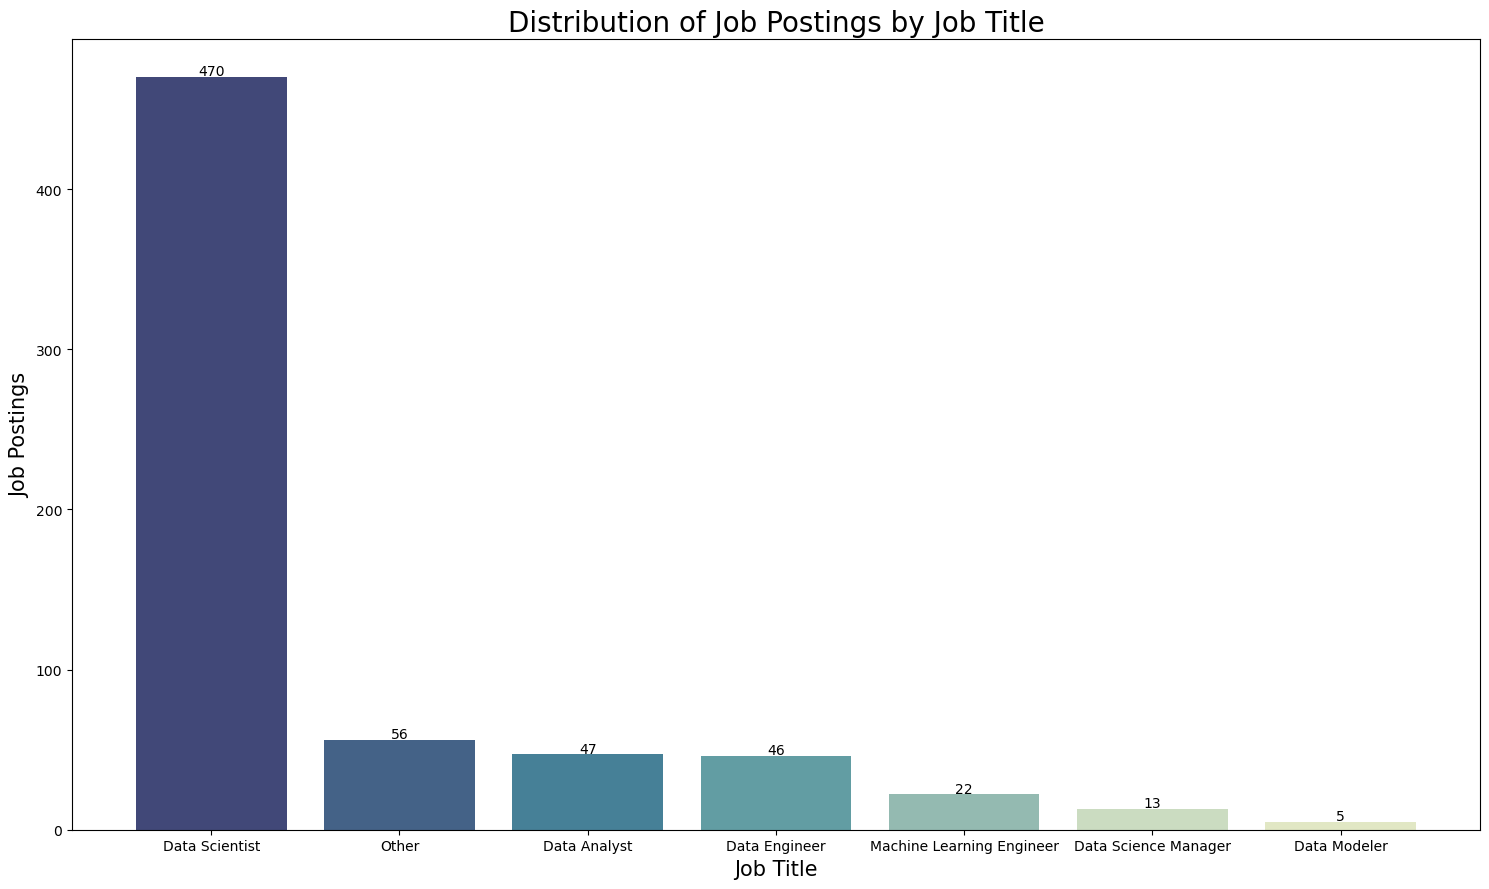

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 9))

color_pal_1 = sns.color_palette('YlGnBu_r', len(df['Simplified Job Title'].value_counts()), desat=0.5)
ax1.bar(df['Simplified Job Title'].value_counts().index, df['Simplified Job Title'].value_counts(), color=color_pal_1)

for i, v in enumerate(df['Simplified Job Title'].value_counts()):
    ax1.text(i, v + 1, str(v), ha='center')

plt.title('Distribution of Job Postings by Job Title', fontsize = 20)
plt.ylabel('Job Postings', fontsize = 15)
plt.xlabel('Job Title', fontsize = 15)

plt.tight_layout()

### Salary Estimate by Job Title

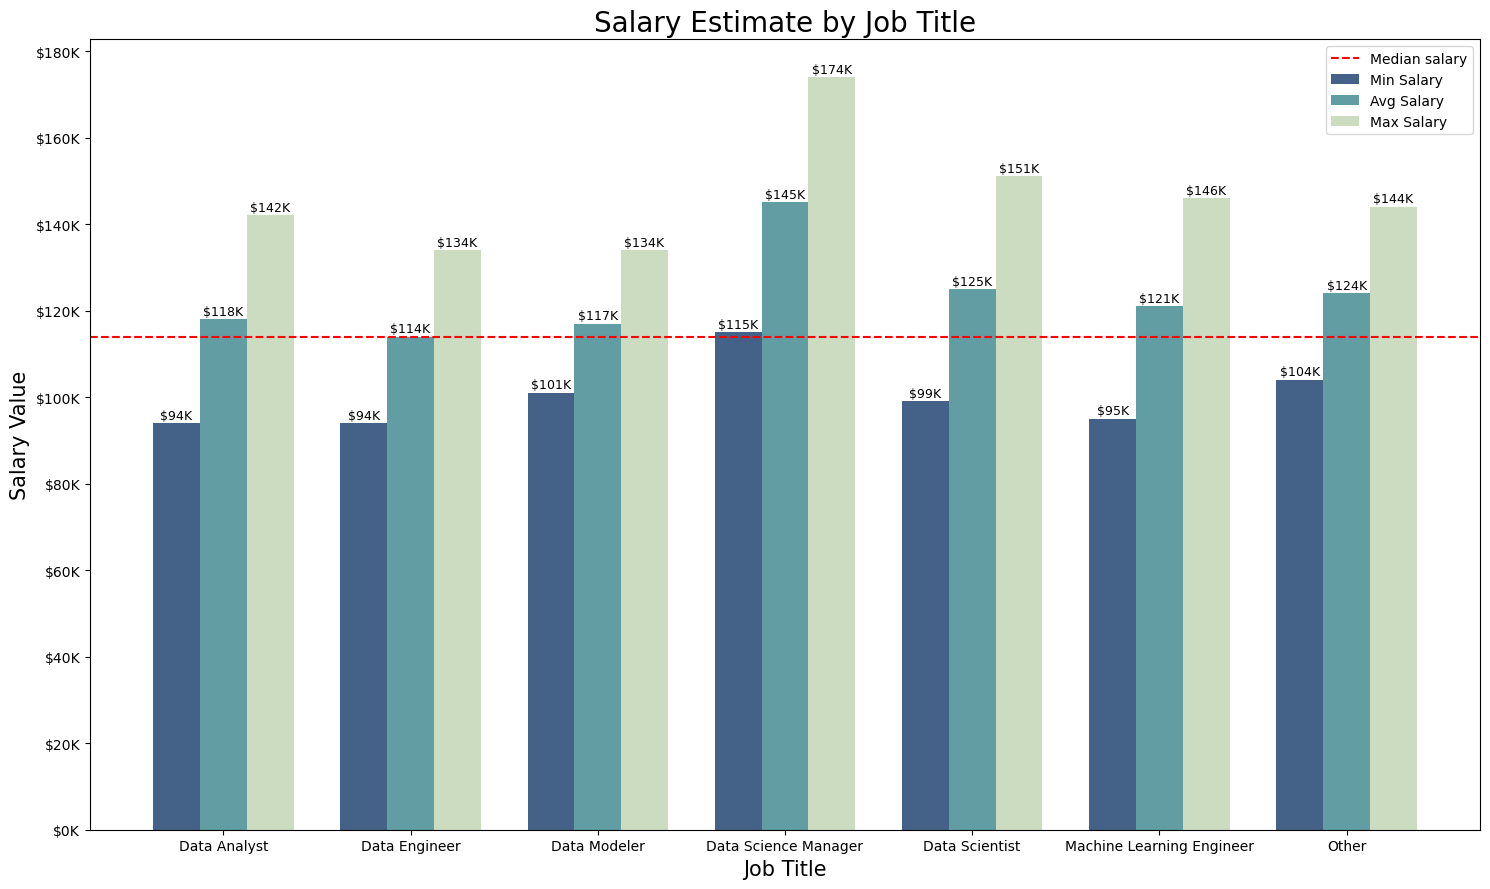

In [22]:
min_salary = (df.groupby('Simplified Job Title')['Min salary'].mean()).round().astype(int)
avg_salary = (df.groupby('Simplified Job Title')['Avg salary'].mean()).round().astype(int)
max_salary = (df.groupby('Simplified Job Title')['Max salary'].mean()).round().astype(int)

median_salary = df['Avg salary'].median()

fig, ax2 = plt.subplots(figsize = (15, 9))

arange_2 = np.arange(len(avg_salary))

color_pal_2 = sns.color_palette('YlGnBu_r', 3, desat=0.5)
ax2.bar(arange_2 - 0.25, min_salary, width=0.25, label='Min Salary', color=color_pal_2[0])
ax2.bar(arange_2, avg_salary, width=0.25, label='Avg Salary', color=color_pal_2[1])
ax2.bar(arange_2 + 0.25, max_salary, width=0.25, label='Max Salary', color=color_pal_2[2])


ax2.set_xticks(arange_2)
ax2.set_xticklabels(avg_salary.index)

y_tick_2 = np.arange(0, 190, 20)
ax2.set_yticks(y_tick_2)
ax2.set_yticklabels([f'${label}K' for label in y_tick_2])

for i, (min_salary, avg_salary, max_salary) in enumerate(zip(min_salary, avg_salary, max_salary)):
    ax2.text(i - 0.25, min_salary + 1, f'${min_salary}K', ha='center', fontsize=9)
    ax2.text(i, avg_salary + 1, f'${avg_salary}K', ha='center', fontsize=9)
    ax2.text(i + 0.25, max_salary + 1, f'${max_salary}K', ha='center', fontsize=9)

ax2.set_xlabel('Job Title', fontsize = 15)
ax2.set_ylabel('Salary Value', fontsize = 15)
ax2.set_title('Salary Estimate by Job Title', fontsize = 20)


ax2.axhline(median_salary, color='r', linestyle='--', label='Median salary')
ax2.legend()

plt.tight_layout()

### Percentage Distribution of Job Postings by State Abbreviations

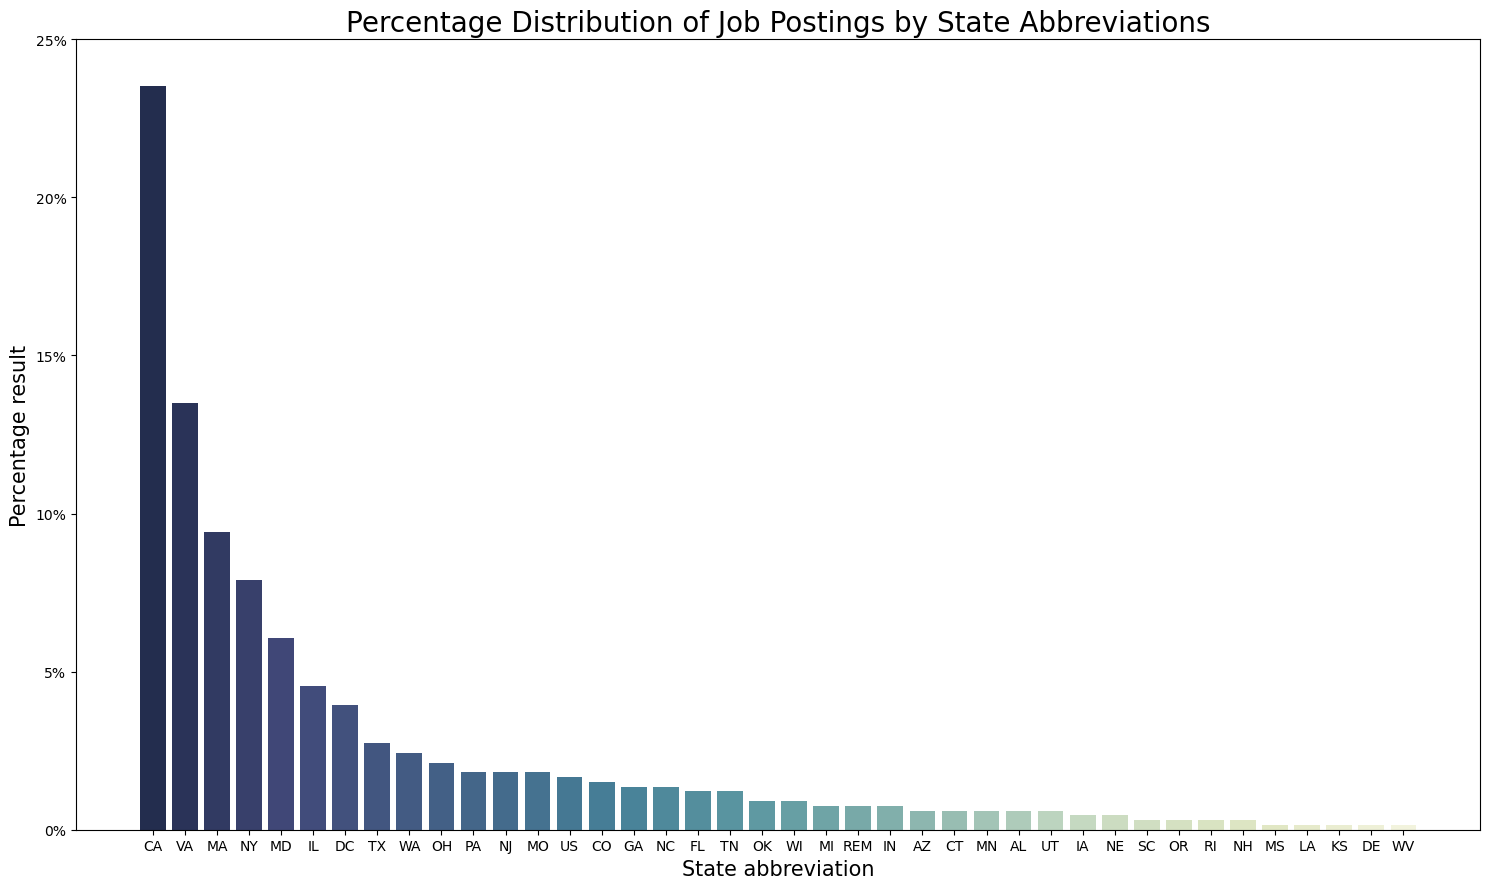

In [23]:
fig, ax3 = plt.subplots(figsize = (15, 9))

color_pal_3 = sns.color_palette('YlGnBu_r', 40, desat=0.5)
ax3.bar((df['Location Abbreviation'].value_counts()).index, (df['Location Abbreviation'].value_counts()/len(df))*100, color=color_pal_3)

y_tick_3 = np.arange(0, 30, 5)
ax3.set_yticks(y_tick_3)
ax3.set_yticklabels([f'{tick}%' for tick in y_tick_3])

ax3.set_title('Percentage Distribution of Job Postings by State Abbreviations', fontsize=20)
ax3.set_ylabel('Percentage result', fontsize=15)
ax3.set_xlabel('State abbreviation', fontsize=15)

plt.tight_layout()
plt.show()

### Average Salary Comparison: 10 States with Highest and Lowest Job Postings

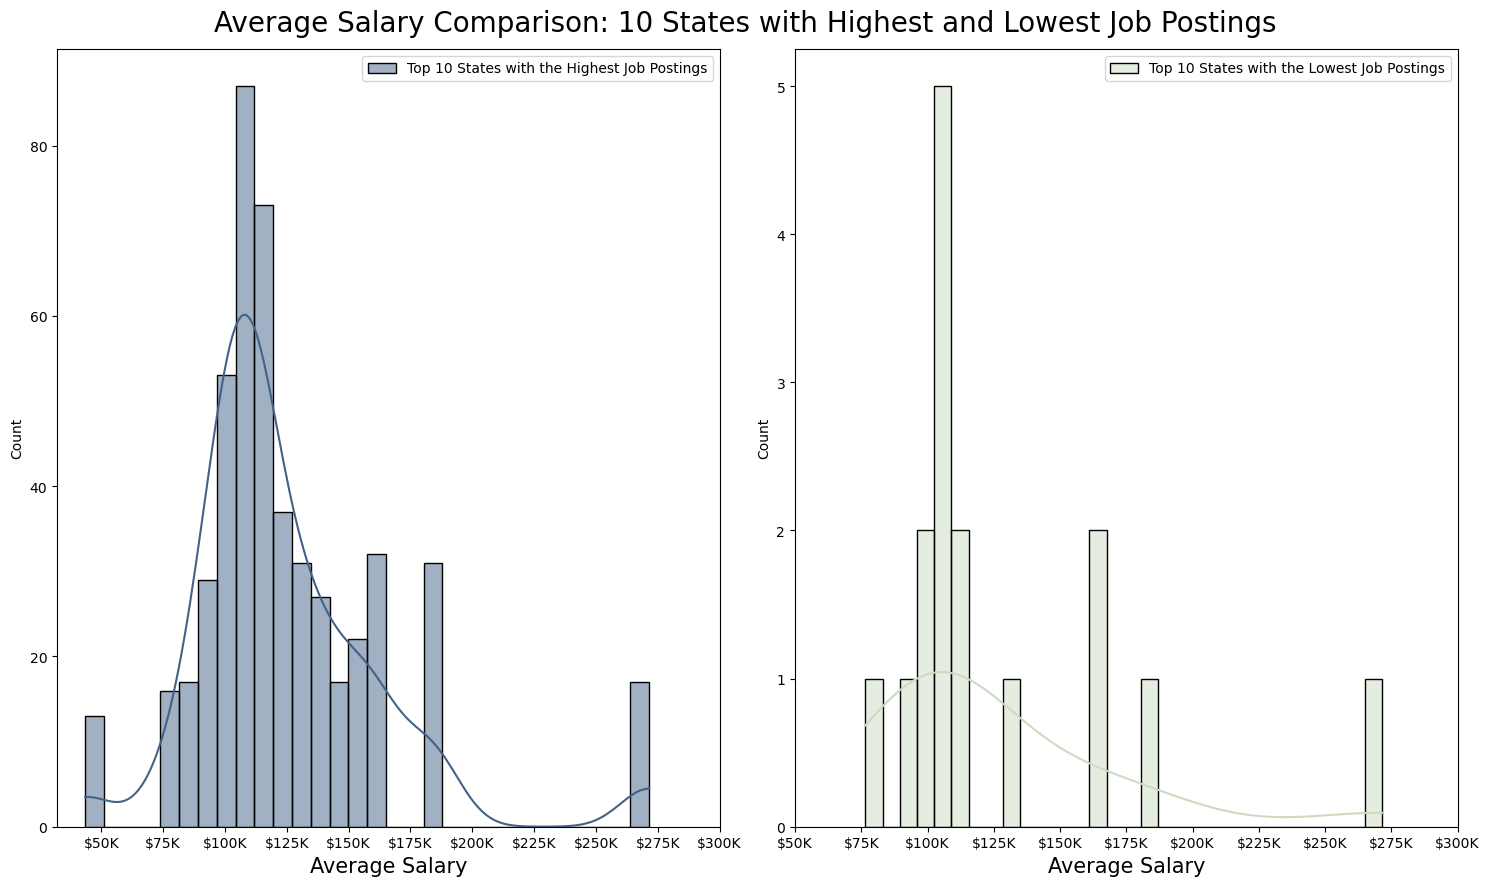

In [24]:
top_10_states  = df['Location Abbreviation'].value_counts().iloc[0:10]
bottom_10_states = df['Location Abbreviation'].value_counts().iloc[:-11:-1]

fig, (ax4, ax5) = plt.subplots(1, 2, figsize = (15, 9))

sns.histplot(df.loc[df['Location Abbreviation'].isin(top_10_states.index), 'Avg salary'], ax=ax4, bins=30, kde=True, color=color_pal_2[0], label='Top 10 States with the Highest Job Postings')
sns.histplot(df.loc[df['Location Abbreviation'].isin(bottom_10_states.index), 'Avg salary'], ax=ax5, bins=30, kde=True, color=color_pal_2[2], label='Top 10 States with the Lowest Job Postings')

x_tick_4 = np.arange(50, 325, 25)
ax4.set_xticks(x_tick_4)
ax4.set_xticklabels([f'${tick}K' for tick in x_tick_4])
ax5.set_xticks(x_tick_4)
ax5.set_xticklabels([f'${tick}K' for tick in x_tick_4])

ax4.set_xlabel('Average Salary', fontsize=15)
ax5.set_xlabel('Average Salary', fontsize=15)
fig.suptitle('Average Salary Comparison: 10 States with Highest and Lowest Job Postings', fontsize=20)

ax4.legend()
ax5.legend()
plt.tight_layout()

### Company Age Comparison: 10 States with Highest and Lowest Job Postings

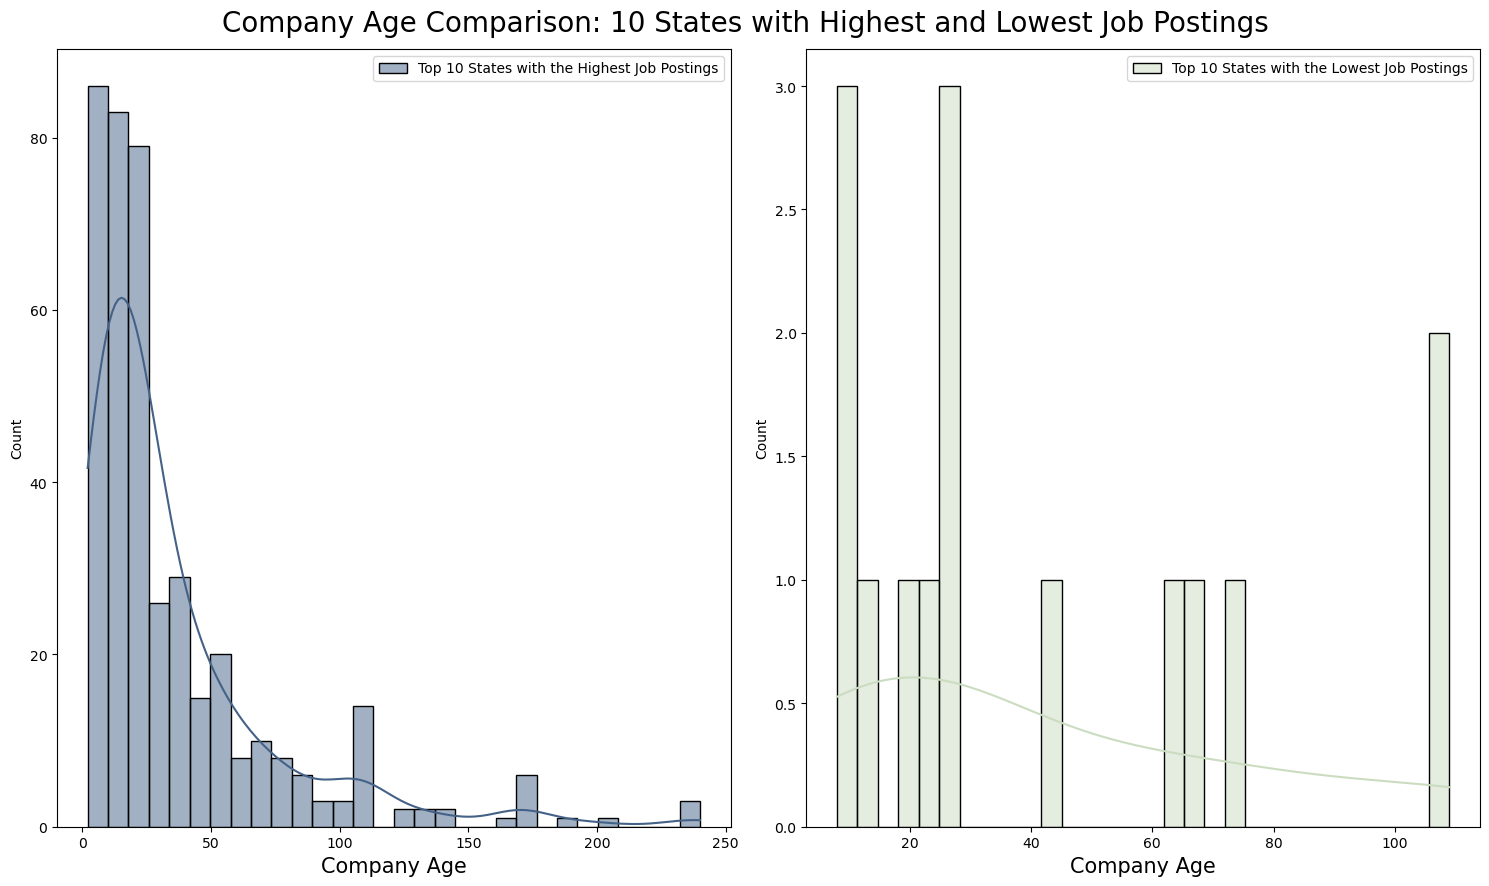

In [25]:
fig, (ax6, ax7) = plt.subplots(1, 2, figsize = (15, 9))

sns.histplot(df.loc[df['Location Abbreviation'].isin(top_10_states.index) & (df['Company Age'] != 'Unknown')], x='Company Age', ax=ax6, bins=30, kde=True, color=color_pal_2[0], label='Top 10 States with the Highest Job Postings')
sns.histplot(df.loc[df['Location Abbreviation'].isin(bottom_10_states.index) & (df['Company Age'] != 'Unknown')], x='Company Age', ax=ax7, bins=30, kde=True, color=color_pal_2[2], label='Top 10 States with the Lowest Job Postings')

plt.suptitle('Company Age Comparison: 10 States with Highest and Lowest Job Postings', fontsize=20)
ax6.set_xlabel('Company Age', fontsize=15)
ax7.set_xlabel('Company Age', fontsize=15)

ax6.legend()
ax7.legend()
plt.tight_layout()

### Distribution of Job Postings by Sector Type

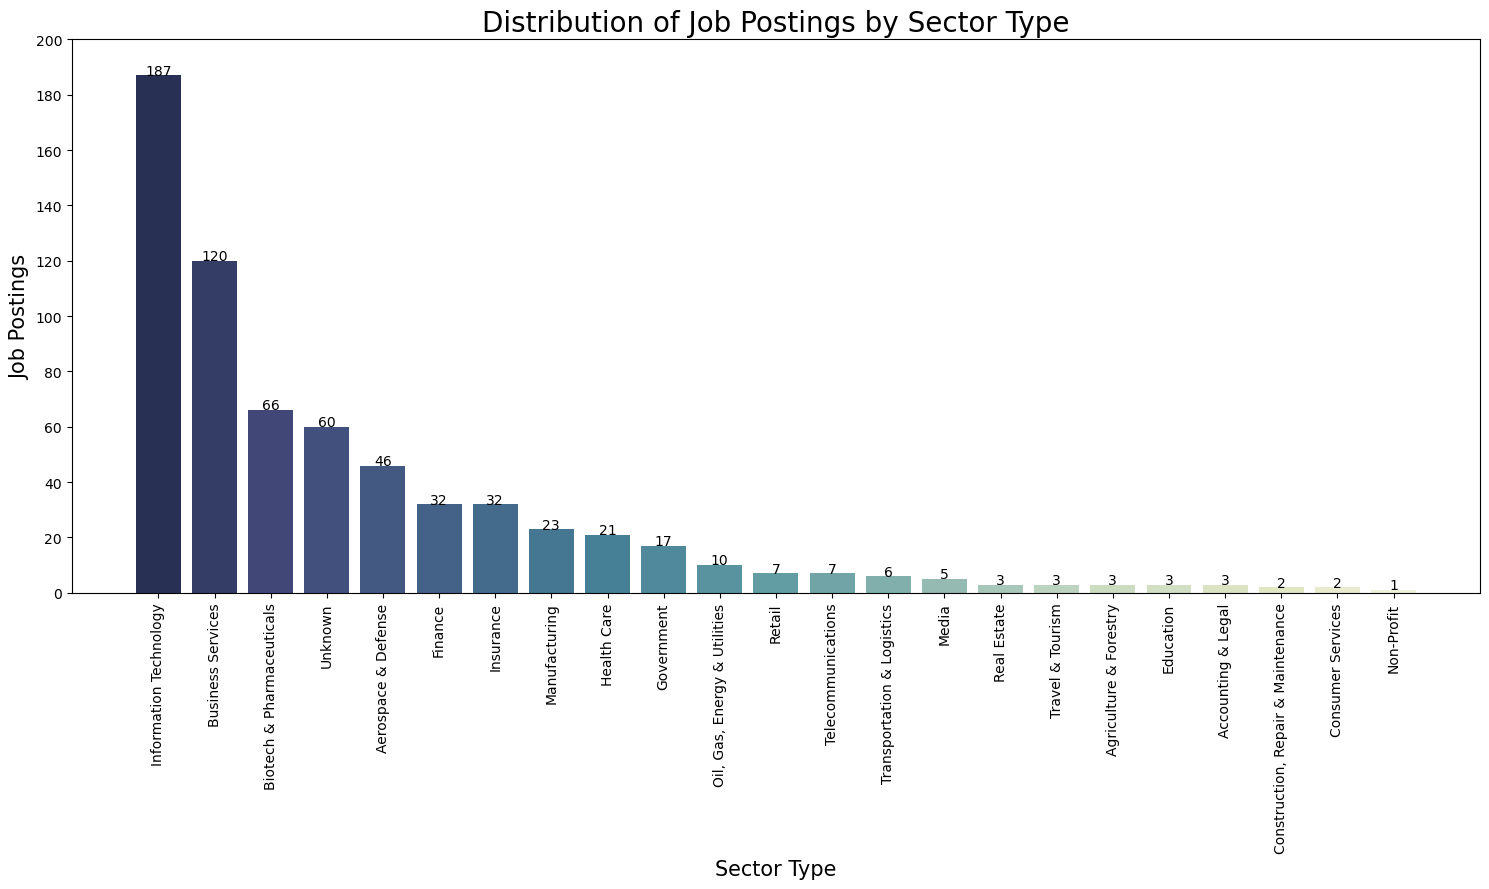

In [26]:
fig, ax8 = plt.subplots(figsize = (15, 9))
color_pal_8 = sns.color_palette('YlGnBu_r', len(df['Sector'].value_counts()), desat=0.5)

ax8.bar((df['Sector'].value_counts()).index, df['Sector'].value_counts(), color=color_pal_8)

y_tick_8 = np.arange(0,220, 20)
ax8.set_yticks(y_tick_8)
ax8.tick_params(axis='x', rotation=90)

for i, v in enumerate(df['Sector'].value_counts()):
    ax8.text(i, v + 0.25, f'{v}', ha='center')

ax8.set_title('Distribution of Job Postings by Sector Type', fontsize=20)
ax8.set_ylabel('Job Postings', fontsize=15)
ax8.set_xlabel('Sector Type', fontsize=15)


plt.tight_layout()

### Distribution of Job Postings by Industry Type

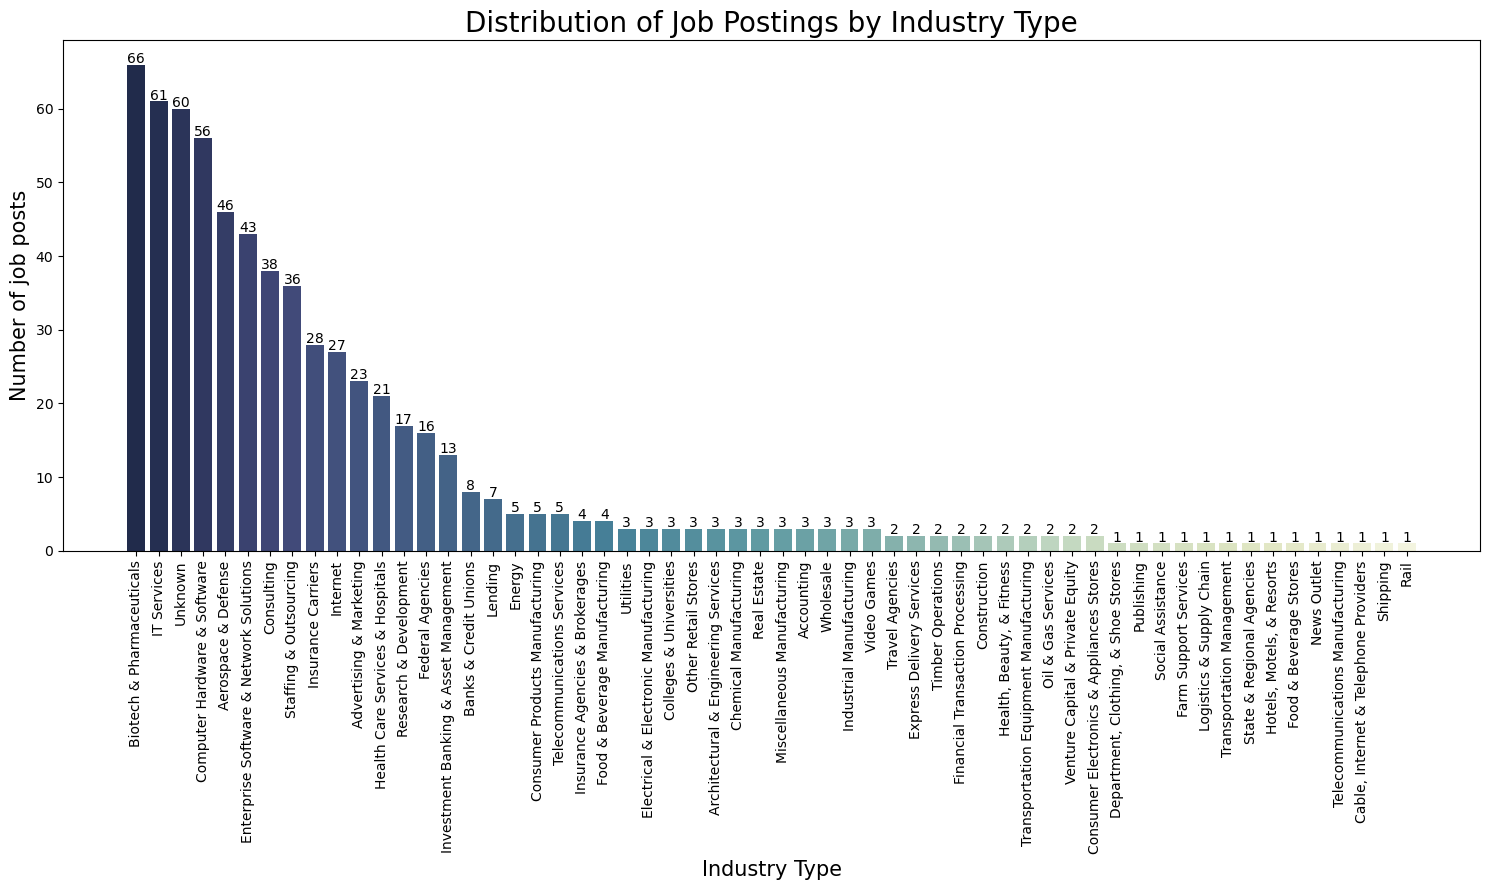

In [27]:
fig, ax9 = plt.subplots(figsize = (15, 9))
color_pal_9 = sns.color_palette('YlGnBu_r', len(df['Industry'].value_counts()), desat=0.5)

ax9.bar(df['Industry'].value_counts().index, df['Industry'].value_counts(), color=color_pal_9)

ax9.tick_params(axis='x', rotation=90)

for i, v in enumerate(df['Industry'].value_counts()):
    ax9.text(i, v + 0.25, f'{v}', ha='center')

ax9.set_title('Distribution of Job Postings by Industry Type', fontsize=20)
ax9.set_ylabel('Number of job posts', fontsize=15)
ax9.set_xlabel('Industry Type', fontsize=15)

plt.tight_layout()

### Percentage distribution of Job Postings by Company Size

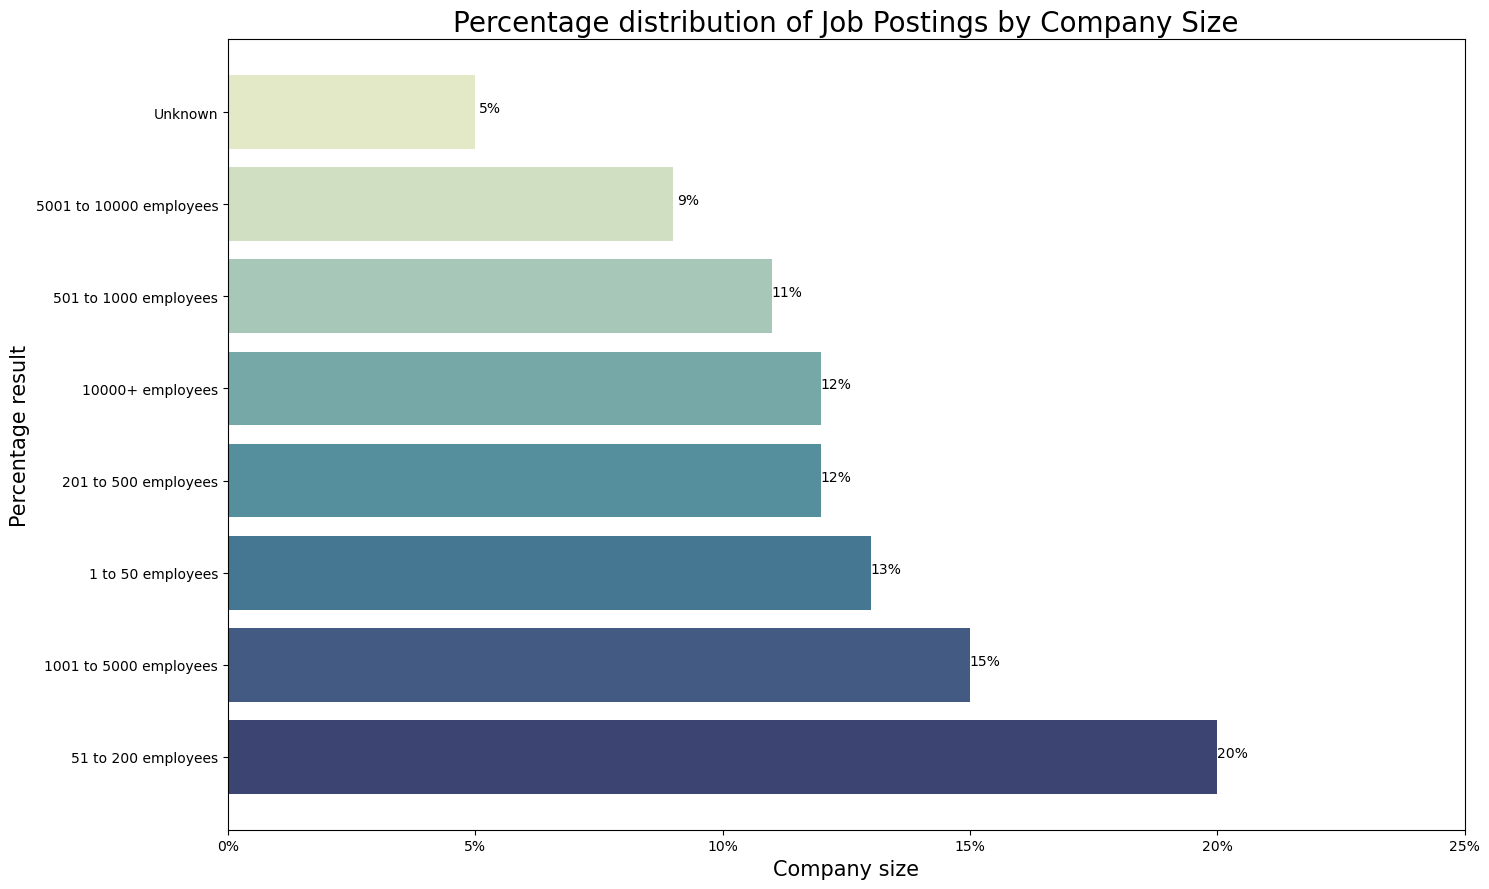

In [28]:
fig, ax10 = plt.subplots(figsize = (15, 9))
color_pal_10 = sns.color_palette('YlGnBu_r', len(df['Size'].value_counts()), desat=0.5)

ax10.barh(((df['Size'].value_counts() / len(df)) * 100).round(2).astype(int).index, ((df['Size'].value_counts() / len(df)) * 100).round(2).astype(int), color=color_pal_10)

for i, v in enumerate(((df['Size'].value_counts() / len(df)) * 100).round(2).astype(int)):
    ax10.text(v + 0.3, i, f'{v}%', ha='center')

x_tick_10 = np.arange(0, 30, 5)
ax10.set_xticks(x_tick_10)
ax10.set_xticklabels([f'{tick}%' for tick in x_tick_10])

ax10.set_title('Percentage distribution of Job Postings by Company Size', fontsize=20)
ax10.set_ylabel('Percentage result', fontsize=15)
ax10.set_xlabel('Company size', fontsize=15)

plt.tight_layout()

### Percentage Distribution of Job Postings by Type of Ownership

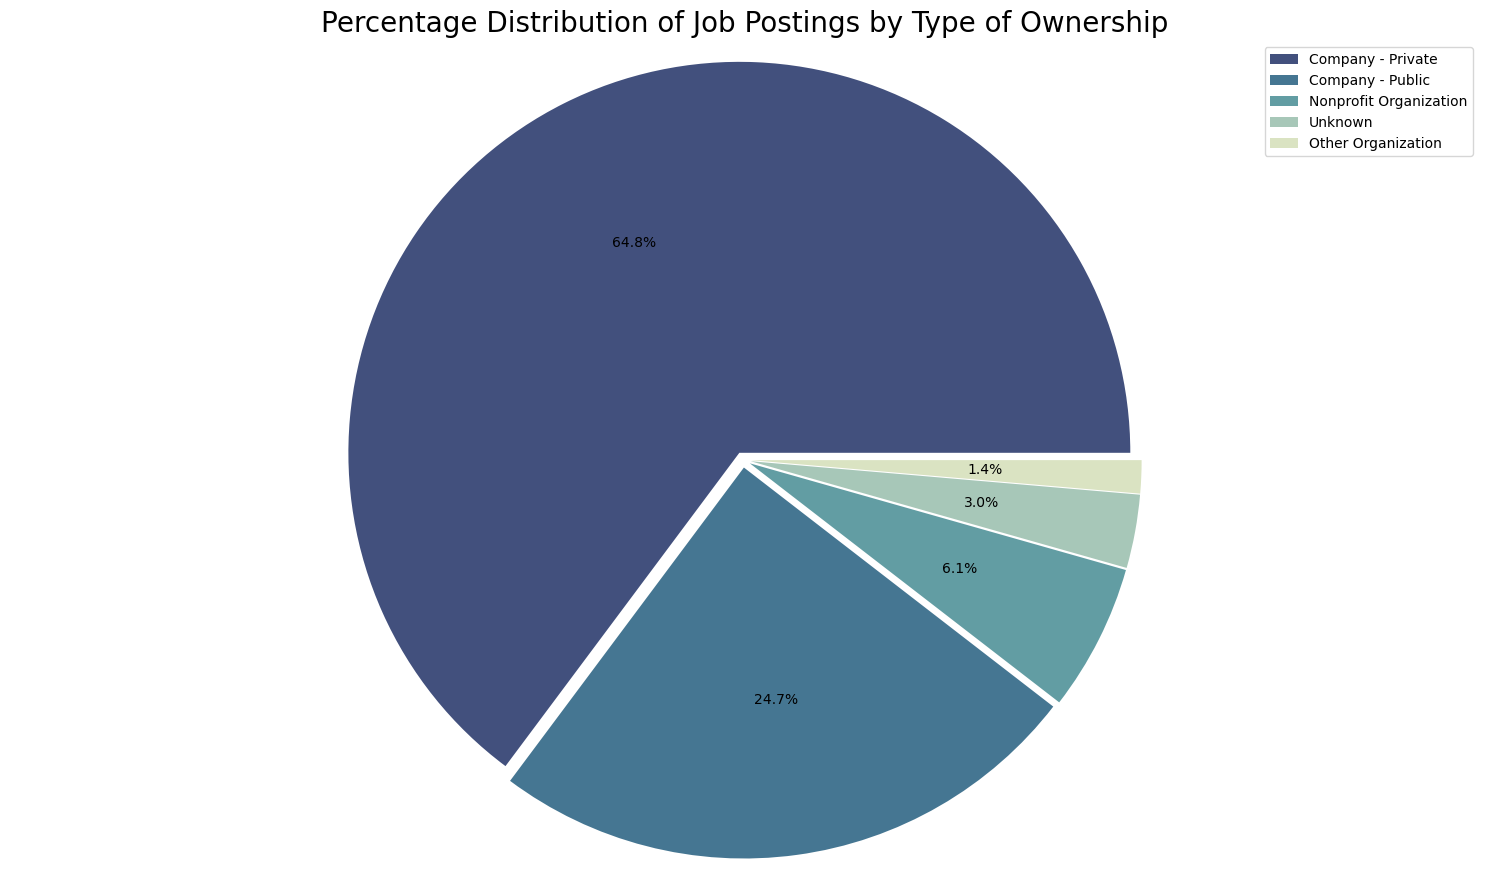

In [29]:
fig, ax11 = plt.subplots(figsize = (15, 9))
color_pal_11 = sns.color_palette('YlGnBu_r', 5, desat=0.5)

ax11.pie((df['Type of ownership'].value_counts() / len(df)) * 100, autopct='%1.1f%%', explode=[0.02]*5, colors=color_pal_11)

plt.legend(df['Type of ownership'].value_counts().index)
ax11.set_title('Percentage Distribution of Job Postings by Type of Ownership', fontsize=20)

plt.axis('equal')
plt.tight_layout()

### Correlation Heatmap

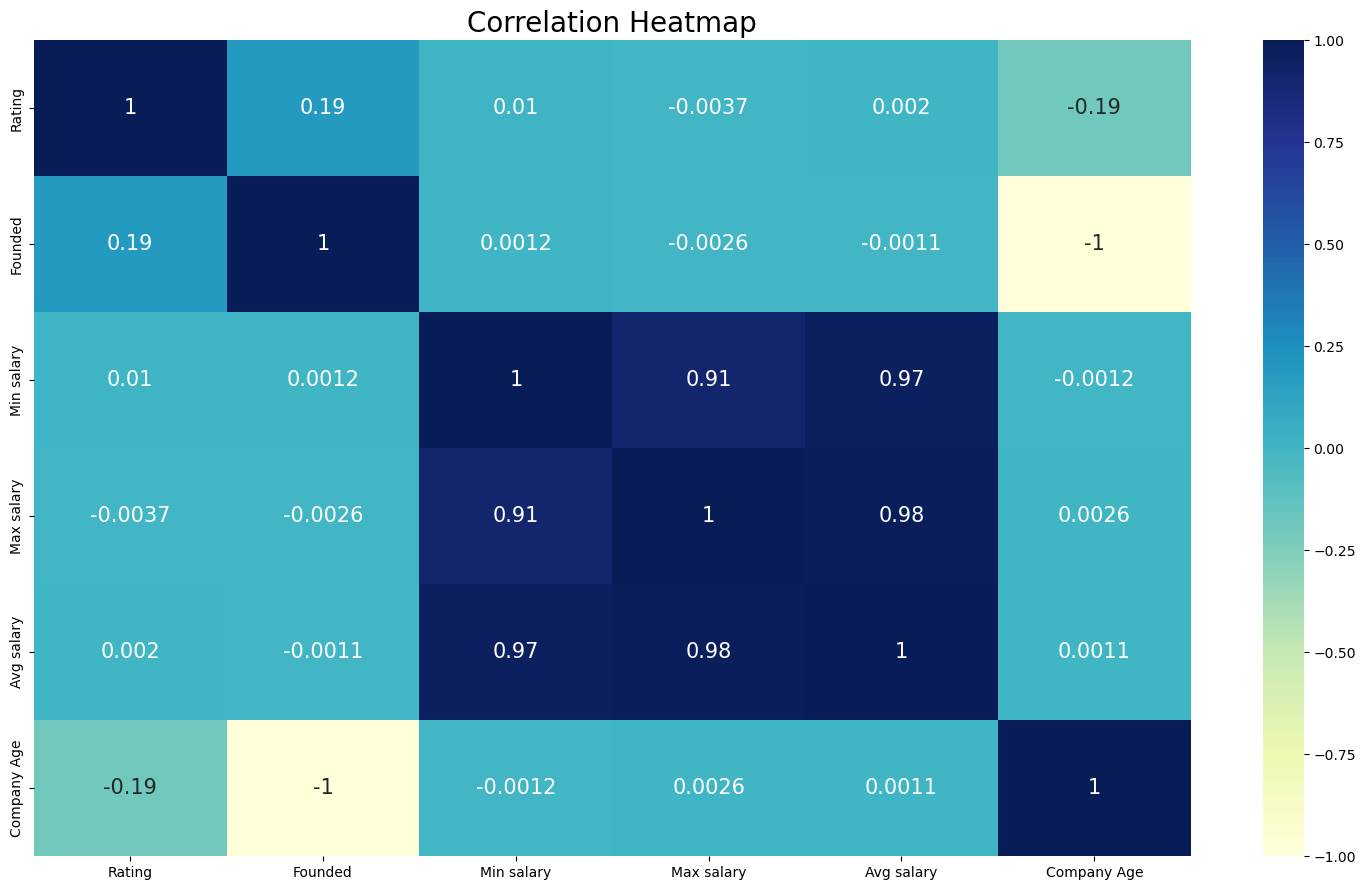

In [30]:
corr_data = (df[['Rating', 'Founded', 'Min salary', 'Max salary', 'Avg salary', 'Company Age',]].apply(pd.to_numeric, errors='coerce')).corr()

fig, ax12 = plt.subplots(figsize = (15, 9))

heatmap = sns.heatmap(corr_data, cmap='YlGnBu', vmin=-1, vmax=1, annot=True, annot_kws={"fontsize": 15})

ax12.set_title('Correlation Heatmap', fontsize=20)

plt.tight_layout()

### Distribution of Rating values by Founded Year

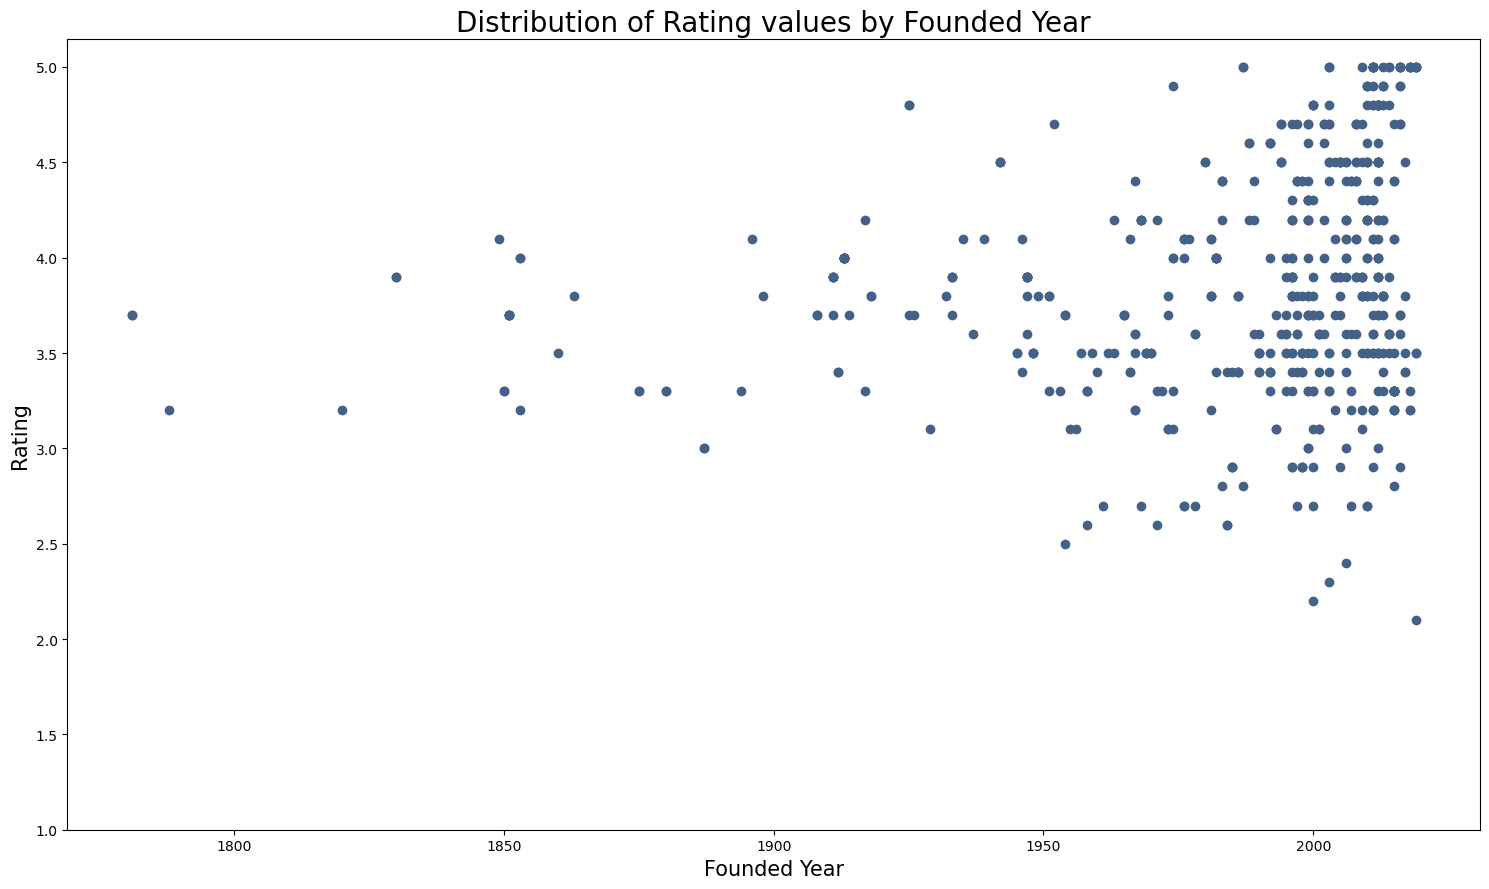

In [31]:
fig, ax13 = plt.subplots(figsize = (15, 9))

rating_num = df[(df['Rating']!='Unknown') & (df['Founded']!='Unknown')]
plt.scatter(rating_num['Founded'], rating_num['Rating'], color=color_pal_2[0])

y_tick_13 = np.arange(1, 5.5, 0.5)
ax13.set_yticks(y_tick_13)

ax13.set_title('Distribution of Rating values by Founded Year', fontsize=20)
ax13.set_ylabel('Rating', fontsize=15)
ax13.set_xlabel('Founded Year', fontsize=15)

plt.tight_layout()

### Percentage Distribution of Skills Required by Job Title

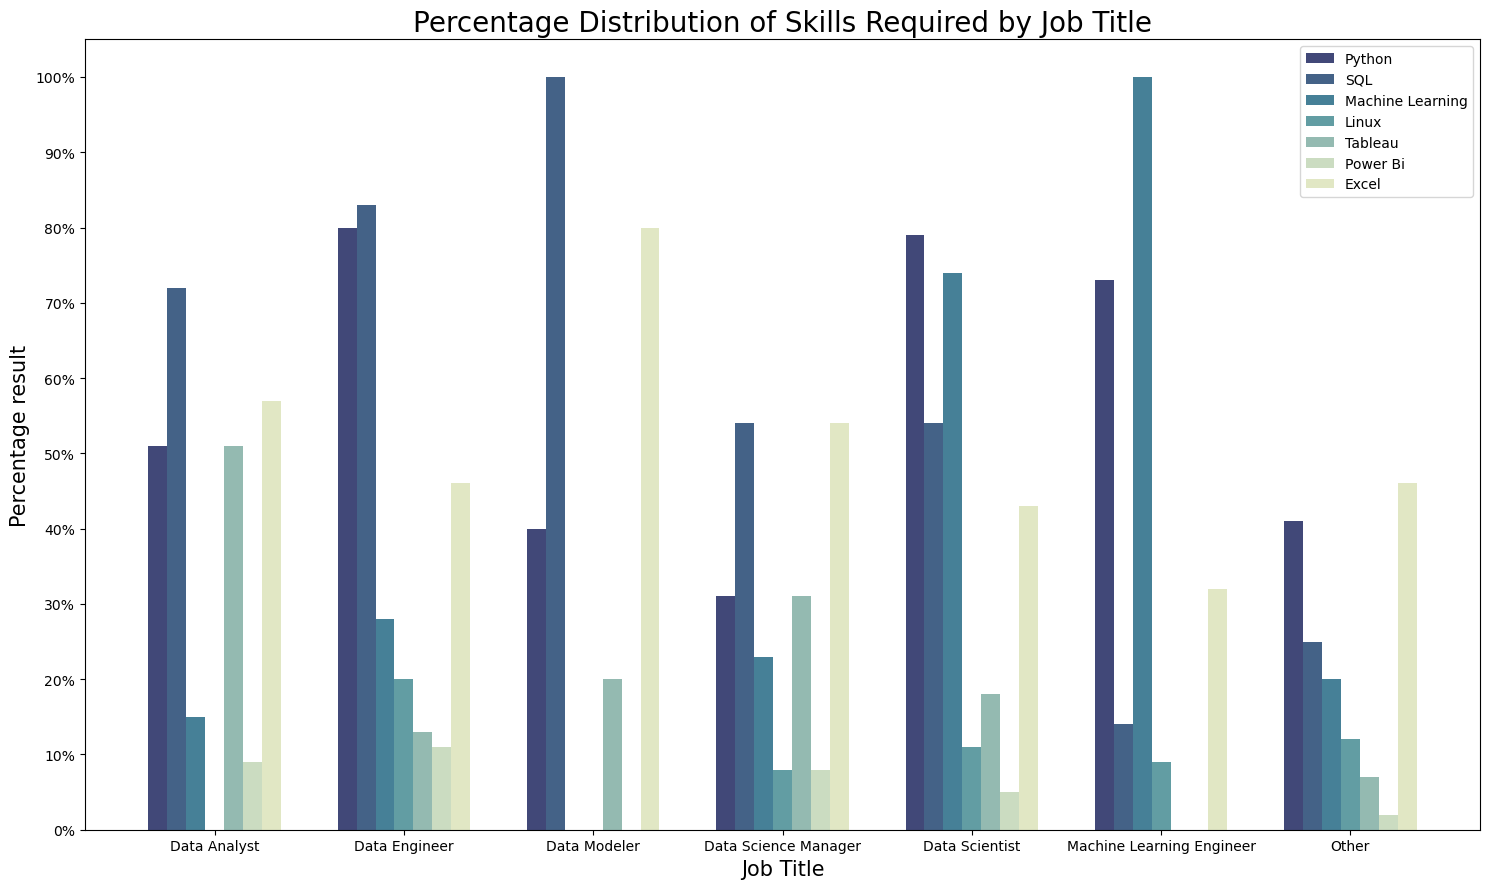

In [32]:
grouped_job_t_sorted = df['Simplified Job Title'].value_counts().sort_index()

Python_True = df.groupby('Simplified Job Title')['Python'].sum().sort_index()
SQL_True = df.groupby('Simplified Job Title')['SQL'].sum().sort_index()
ML_True = df.groupby('Simplified Job Title')['Machine Learning'].sum().sort_index()
Linux_True = df.groupby('Simplified Job Title')['Linux'].sum().sort_index()
Tableau_True = df.groupby('Simplified Job Title')['Tableau'].sum().sort_index()
Power_Bi_True = df.groupby('Simplified Job Title')['Power Bi'].sum().sort_index()
Excel_True = df.groupby('Simplified Job Title')['Excel'].sum().sort_index()

Python_T_P = ((Python_True.values/grouped_job_t_sorted.values)*100).round().astype(int)
SQL_T_P = ((SQL_True.values/grouped_job_t_sorted.values)*100).round().astype(int)
ML_T_P = ((ML_True.values/grouped_job_t_sorted.values)*100).round().astype(int)
Linux_T_P = ((Linux_True.values/grouped_job_t_sorted.values)*100).round().astype(int)
Tableau_T_P = ((Tableau_True.values/grouped_job_t_sorted.values)*100).round().astype(int)
Power_Bi_T_P = ((Power_Bi_True.values/grouped_job_t_sorted.values)*100).round().astype(int)
Excel_T_P = ((Excel_True.values/grouped_job_t_sorted.values)*100).round().astype(int)


fig, ax14 = plt.subplots(figsize = (15, 9))

arrange_14 = np.arange(len(Python_True))
width_14 = 0.1

ax14.bar(arrange_14 - 0.3, Python_T_P, width_14, label='Python', color=color_pal_1[0])
ax14.bar(arrange_14 - 0.2, SQL_T_P, width_14, label='SQL', color=color_pal_1[1])
ax14.bar(arrange_14 - 0.1, ML_T_P, width_14, label='Machine Learning', color=color_pal_1[2])
ax14.bar(arrange_14, Linux_T_P, width_14, label='Linux', color=color_pal_1[3])
ax14.bar(arrange_14 + 0.1, Tableau_T_P, width_14, label='Tableau', color=color_pal_1[4])
ax14.bar(arrange_14 + 0.2, Power_Bi_T_P, width_14, label='Power Bi', color=color_pal_1[5])
ax14.bar(arrange_14 + 0.3, Excel_T_P, width_14, label='Excel', color=color_pal_1[6])

x_tick_14 = grouped_job_t_sorted.index
ax14.set_xticks(np.arange(len(x_tick_14)))
ax14.set_xticklabels(x_tick_14)

y_tick_14 = np.arange(0, 110, 10)
ax14.set_yticks(y_tick_14)
ax14.set_yticklabels([f'{tick}%' for tick in y_tick_14])

ax14.set_title('Percentage Distribution of Skills Required by Job Title', fontsize=20)
ax14.set_xlabel('Job Title', fontsize=15)
ax14.set_ylabel('Percentage result', fontsize=15)

ax14.legend()
plt.tight_layout()

### Percentage Distribution of Educational Requirements

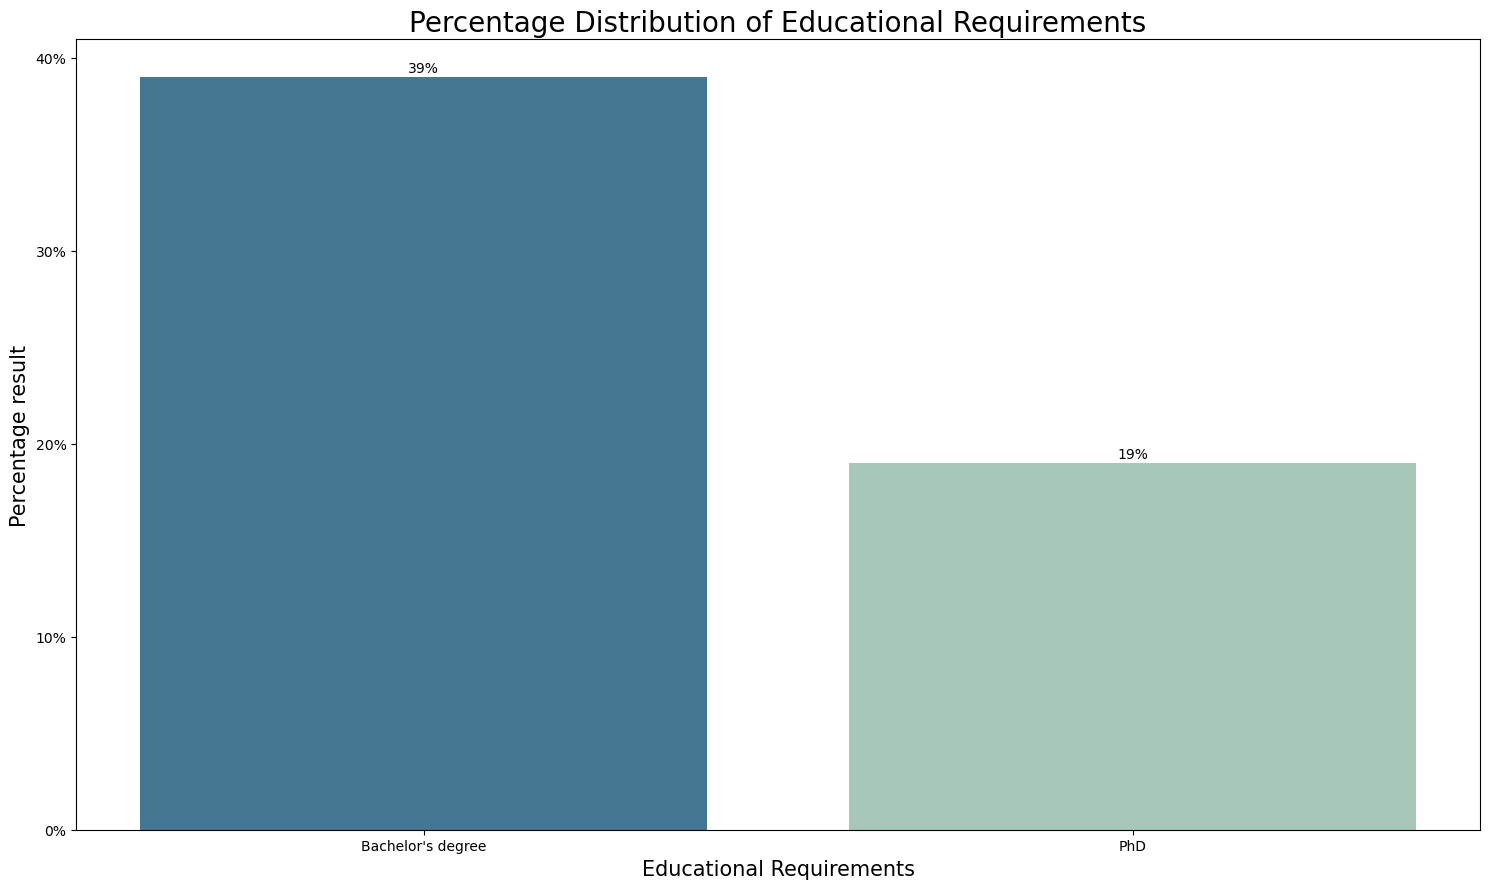

In [33]:
Bachelor_grouped_P = ((df['Bachelor'].sum()/len(df))*100).round().astype(int)
PhD_grouped_P = ((df['PhD'].sum()/len(df))*100).round().astype(int)

Education_P = [Bachelor_grouped_P, PhD_grouped_P]
Education_List = ['Bachelor\'s degree', 'PhD']

fig, ax15 = plt.subplots(figsize = (15, 9))

color_pal_15 = sns.color_palette('YlGnBu_r', 2, desat=0.5)
ax15.bar(Education_List, Education_P, color=color_pal_15)

for i, v in enumerate(Education_P):
    ax15.text(i, v + 0.25, f'{v}%', ha='center')

y_tick_15 = np.arange(0, 50, 10)
ax15.set_yticks(y_tick_15)
ax15.set_yticklabels([f'{tick}%' for tick in y_tick_15])

ax15.set_title('Percentage Distribution of Educational Requirements', fontsize=20)
ax15.set_ylabel('Percentage result', fontsize=15)
ax15.set_xlabel('Educational Requirements', fontsize=15)

plt.tight_layout()